# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [30]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [18]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})


Dibuja un diagrama de dispersión (scatter plot) para los datos.

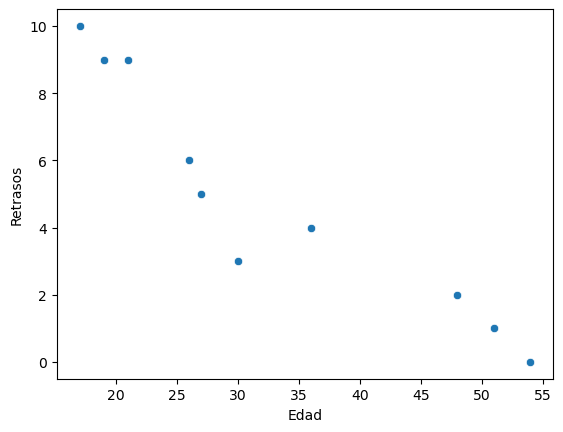

In [21]:
sns.scatterplot(x= student_data['Edad'], y= student_data['Retrasos'], data=student_data)
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Parece que hau una corelacion lineal sobre dos variables 

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [28]:
spearmanr(student_data['Edad'],  student_data['Retrasos'])


SignificanceResult(statistic=-0.9848069807617047, pvalue=2.2888344854823716e-07)

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Assuming student_data is already defined and loaded correctly
student_data = pd.DataFrame(student_data)

# Define your variables
X = student_data['Edad'].values.reshape(-1, 1)  # Predictor variable (independent variable)
y = student_data['Retrasos'].values  # Outcome variable (dependent variable)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model on the training data
lm = LinearRegression()
lm.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)



# Compute R-squared for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Compute MSE for training and testing sets 
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


# Print the results
print('R-squared:')
print('Train:', r2_train)
print('Test:', r2_test)

print('Mean Squared Error:')
print('Train:', mse_train)
print('Test:', mse_test)

Grafica tu modelo de regresión en tu diagrama de dispersión.

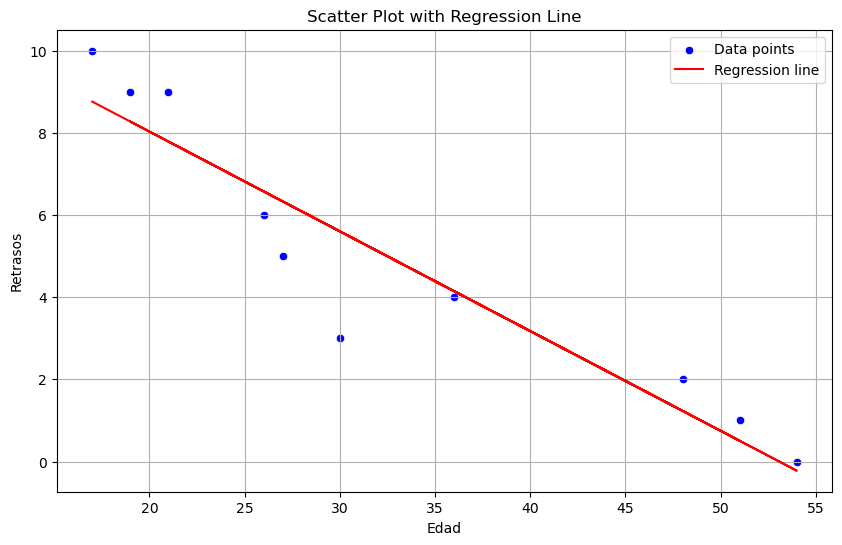

In [44]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=student_data, x='Edad', y='Retrasos', color='blue', label='Data points')
plt.plot(student_data['Edad'], predicted, color='red', label='Regression line')
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()
plt.grid(True)
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

La diferencia significativa entre el rendimiento en el entrenamiento y en la prueba sugiere que el modelo está sobreajustado. Aprendió demasiado bien de los datos de entrenamiento, pero no logró generalizar a nuevos datos.








## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [85]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r'C:\Users\ievav\OneDrive\Documents\Ironhack\Assignments\ironhack-lab-regression-analysis\vehicles.csv')

df = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]


In [87]:
df.head(20)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
5,1997,4.0,14.982273,22,1500,403.954545
6,1997,4.0,13.733750,24,1400,370.291667
7,1997,6.0,16.480500,20,1650,444.350000
8,1998,4.0,14.982273,22,1500,403.954545
9,1998,4.0,13.733750,24,1400,370.291667


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

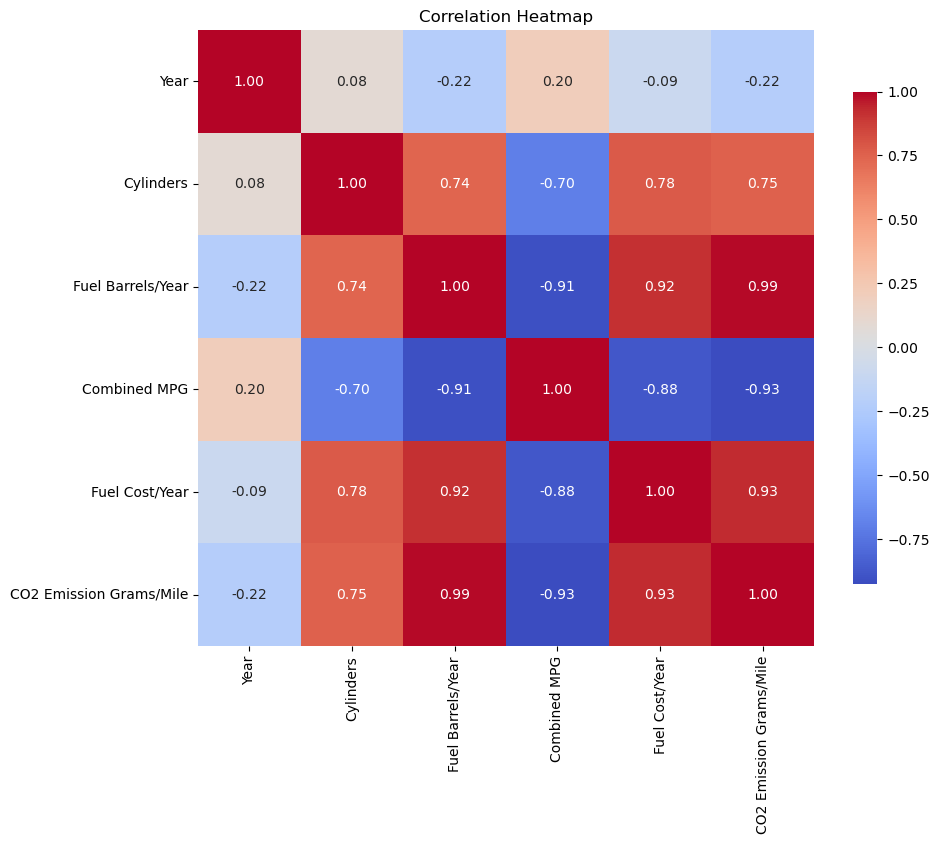

In [91]:
corr = df.corr()
# Create the heatmap with annotations
plt.figure(figsize=(10, 8))  
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Heatmap')
plt.show()

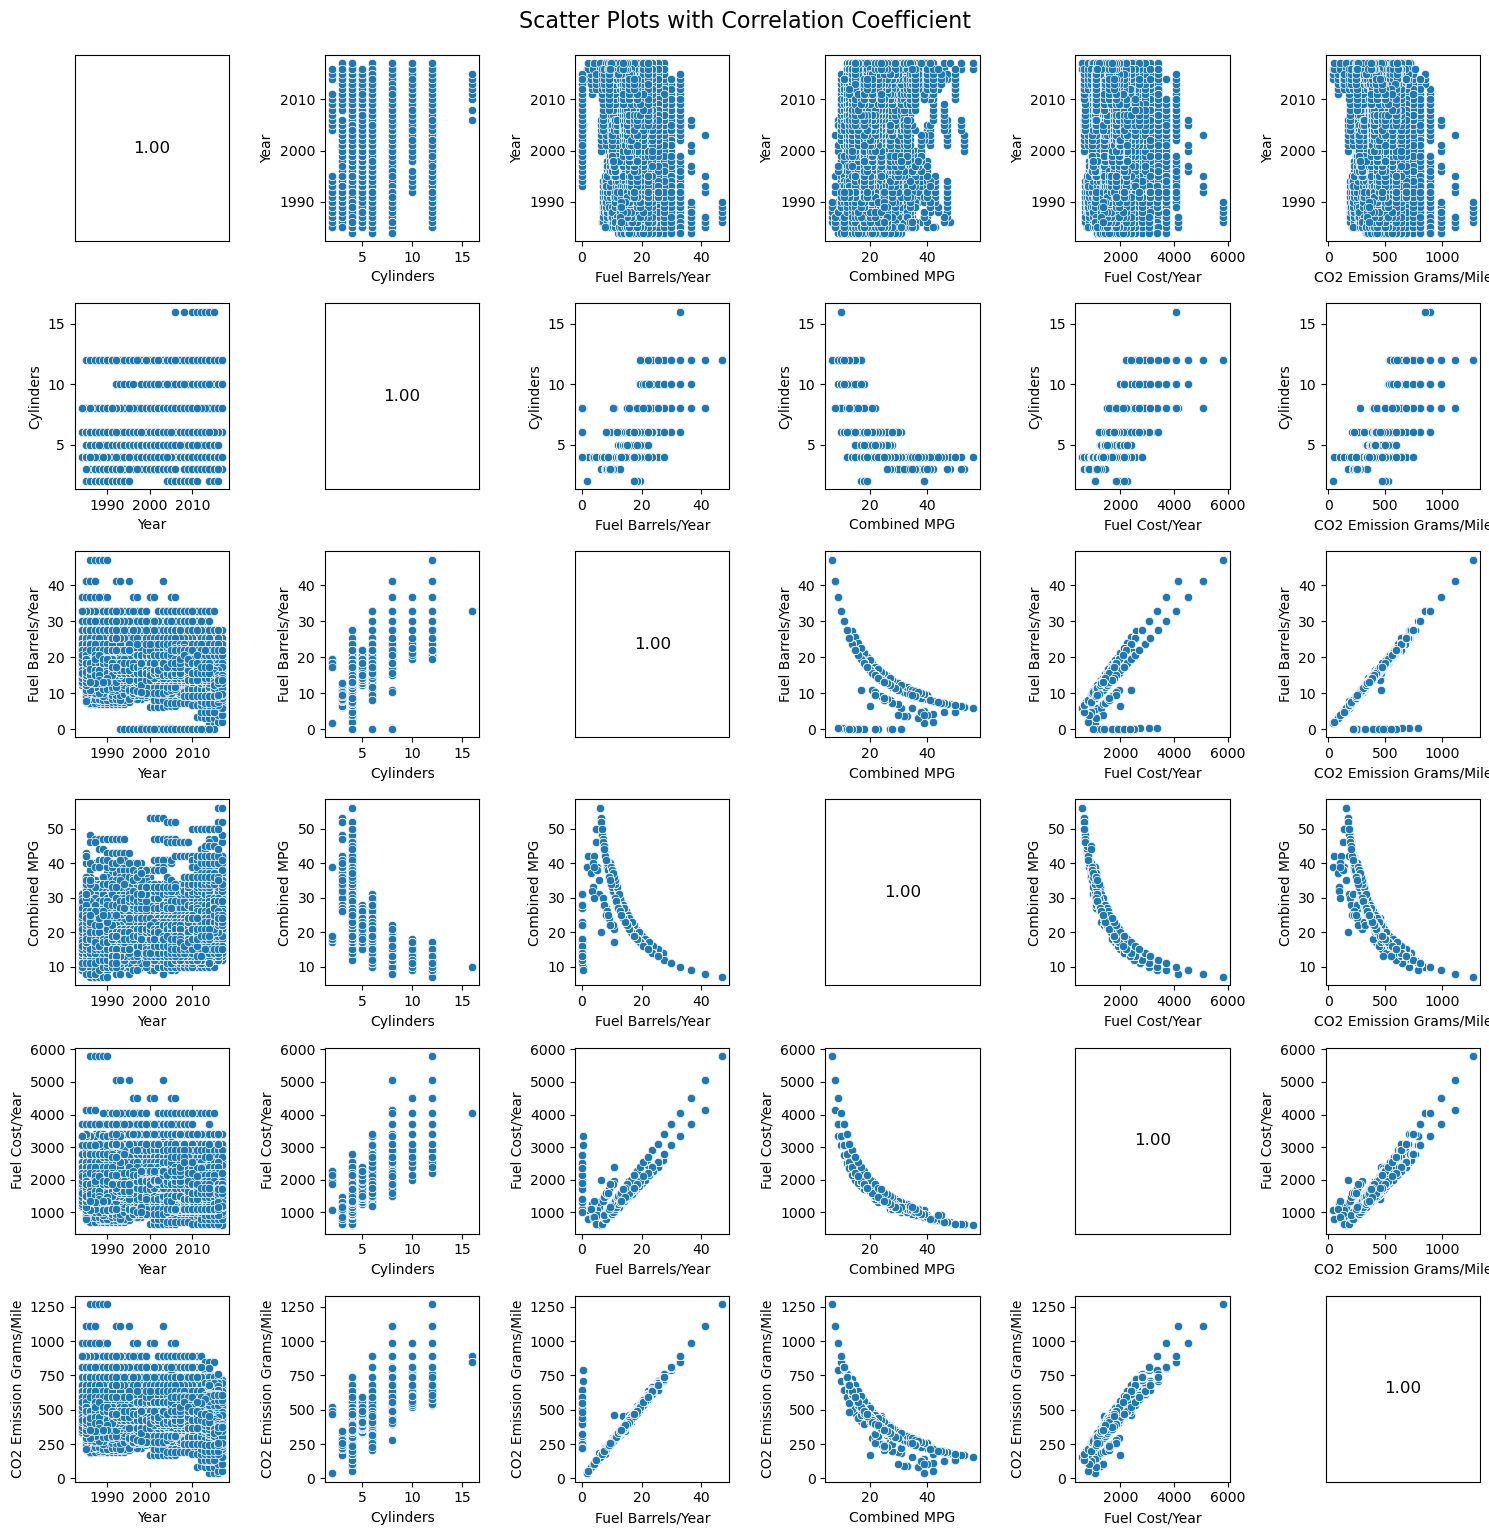

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Create a figure and axis grid
num_vars = len(corr.columns)
fig, axs = plt.subplots(num_vars, num_vars, figsize=(15, 15))

# Iterate over the correlation matrix
for i in range(num_vars):
    for j in range(num_vars):
        if i == j:
            axs[i, j].text(0.5, 0.5, f'{corr.iloc[i, j]:.2f}', 
                           ha='center', va='center', fontsize=12)
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
        else:
            # Scatter plot for the two variables
            sns.scatterplot(x=df[corr.columns[j]], y=df[corr.columns[i]], ax=axs[i, j])
            axs[i, j].set_xlabel(corr.columns[j])
            axs[i, j].set_ylabel(corr.columns[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Scatter Plots with Correlation Coefficient', y=1.02, fontsize=16)
plt.show()


Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

Si miramos solo la línea de fondo, podemos ver qué y cómo se correlaciona con el CO2. Los cilindros, los barriles de combustible por año y el costo de combustible por año son los más correlacionados. De hecho, los barriles de combustible por año parecen estar casi perfectamente correlacionados; podrían ser la misma variable. El MPG combinado está correlacionado negativamente.

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Select features and the dependent variable
X = df[['Cylinders', 'Fuel Barrels/Year', 'Fuel Cost/Year', 'Combined MPG']]  # Independent variables
y = df['CO2 Emission Grams/Mile']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
print('Train R-squared:', r2_score(y_train, y_train_pred))
print('Test R-squared:', r2_score(y_test, y_test_pred))
print('Train MSE:', mean_squared_error(y_train, y_train_pred))
print('Test MSE:', mean_squared_error(y_test, y_test_pred))

# You can also view the coefficients
print('Coefficients:', model.coef_)



Train R-squared: 0.9806559923368878
Test R-squared: 0.9787945096326892
Train MSE: 274.53365514200163
Test MSE: 299.1345306573869
Coefficients: [ 0.97900802 19.80832588  0.02907964 -3.04643261]


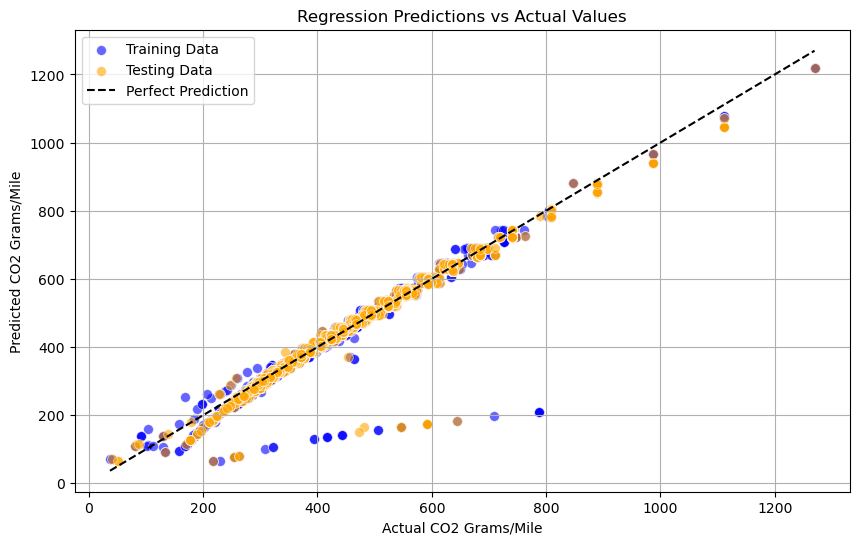

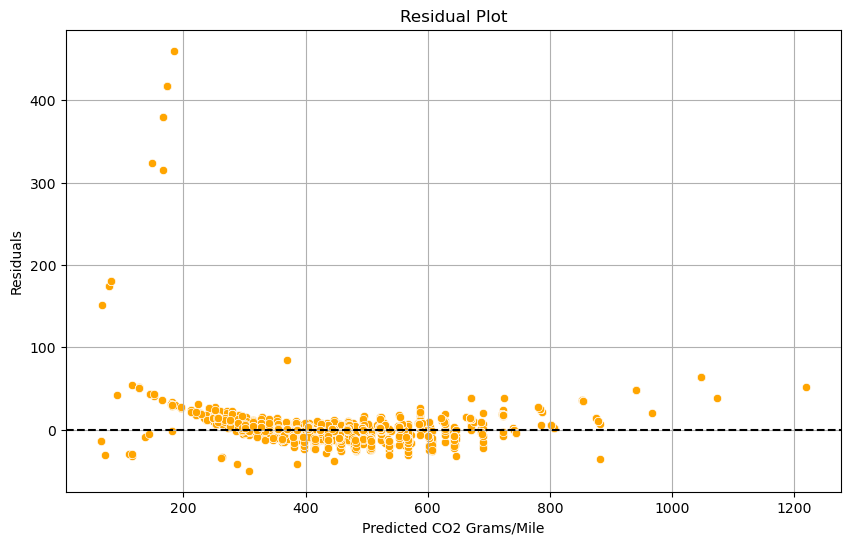

In [122]:
# Create DataFrames for easier plotting
train_data = pd.DataFrame({'Predicted': y_train_pred, 'Actual': y_train})
test_data = pd.DataFrame({'Predicted': y_test_pred, 'Actual': y_test})

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Actual', y='Predicted', color='blue', label='Training Data', s=50, alpha=0.6)
sns.scatterplot(data=test_data, x='Actual', y='Predicted', color='orange', label='Testing Data', s=50, alpha=0.6)

# Add a line for perfect predictions
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--', label='Perfect Prediction')

# Customize the plot
plt.title('Regression Predictions vs Actual Values')
plt.xlabel('Actual CO2 Grams/Mile')
plt.ylabel('Predicted CO2 Grams/Mile')
plt.legend()
plt.grid()
plt.show()

# Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred
sns.scatterplot(x=y_test_pred, y=residuals, color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted CO2 Grams/Mile')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# Los coeficientes parecen seguir las normas esperadas. 
#Sin embargo, parece haber algunos valores atípicos y los residuales no están distribuidos normalmente. 
#Si tuviera que trabajar más con este modelo, probaría las suposiciones y transformaría los valores
# utilizando una transformación logarítmica o valores zeta para asegurar la normalidad de la distribución de los residuales.


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

Fuel Barrels/Year parace como la variable mas importante porque tiene un coeficiente mas alto. 

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [127]:
party_data = pd.DataFrame({'Invitees': [1,3,4,6,8,9,11,14], 'Attendees': [1,2,4,4,5,7,8,13]})


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

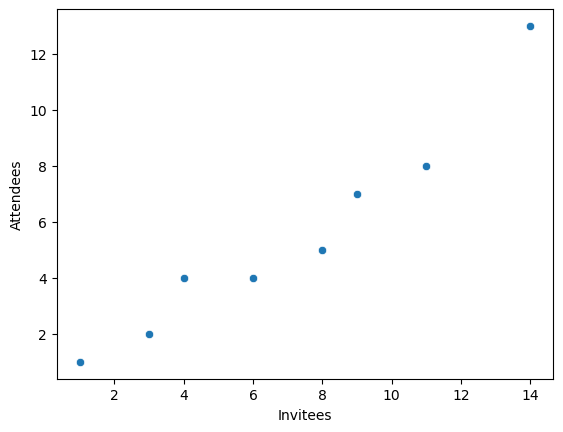

In [131]:
sns.scatterplot(x= 'Invitees', y= 'Attendees', data=party_data)
plt.show()

R-squared:
Train: 0.920489156044916
Test: 0.9930868801319517
Mean Squared Error:
Train: 1.1506986027944113
Test: 0.043206999175302324


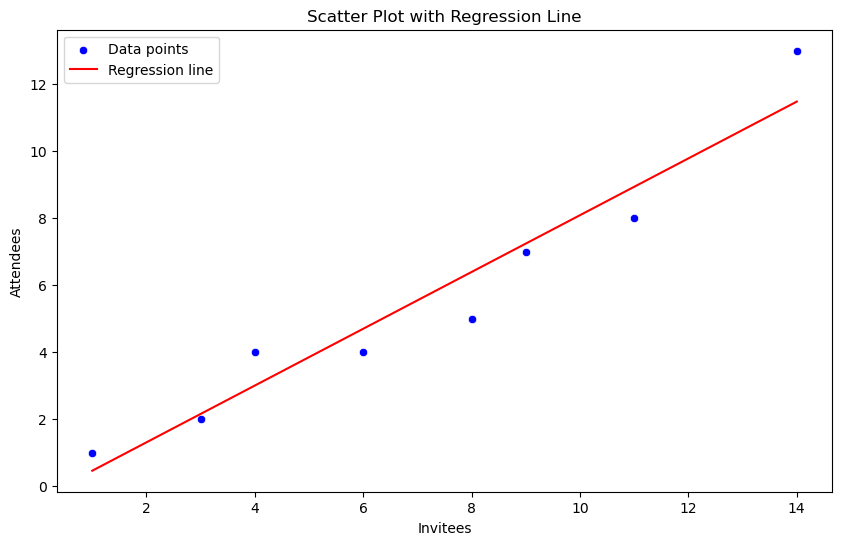

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

party_data = pd.DataFrame(party_data)


# Define your variables
X = party_data['Invitees'].values.reshape(-1, 1)  # Predictor variable (independent variable)
y = party_data['Attendees'].values  # Outcome variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Linear Regression model on the training data
lm = LinearRegression()
lm.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Compute R-squared for training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Compute MSE for training and testing sets 
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print('R-squared:')
print('Train:', r2_train)
print('Test:', r2_test)

print('Mean Squared Error:')
print('Train:', mse_train)
print('Test:', mse_test)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=party_data, x='Invitees', y='Attendees', color='blue', label='Data points')

# Plot the regression line
predicted_line = lm.predict(X)  # Predict using the whole dataset
plt.plot(party_data['Invitees'], predicted_line, color='red', label='Regression line')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Invitees')
plt.ylabel('Attendees')
plt.legend()
plt.show()

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

Un alto valor de R-cuadrado (como **0.993**) para el conjunto de prueba sugiere que el modelo explica una gran parte de la variabilidad en los datos, también puede generar preocupaciones sobre el sobreajuste, especialmente cuando el R-cuadrado del conjunto de entrenamiento también es muy alto (**0.920**).

### Puntos Clave Sobre el Sobreajuste:

1. **Altos Valores de R-cuadrado**: 
   - Cuando tanto los valores de R-cuadrado para el entrenamiento como para el conjunto de prueba son muy altos, indica que el modelo se ajusta bien a los datos. Sin embargo, si el R-cuadrado del conjunto de prueba es significativamente más alto de lo esperado o está cerca de **1**, puede sugerir que el modelo ha aprendido el ruido en los datos de entrenamiento en lugar de la relación subyacente.

2. **Bajo MSE en los Datos de Prueba**:
   - Un error cuadrático medio (MSE) muy bajo para el conjunto de prueba (como **0.043**) en comparación con el MSE del conjunto de entrenamiento (**1.151**) también plantea una alerta. Esta disparidad puede sugerir que el modelo es demasiado complejo, capturando las peculiaridades de los datos de entrenamiento en lugar de generalizar bien.

3. **Evaluación con Validación Cruzada**:
   - Puede ser beneficioso evaluar el modelo utilizando validación cruzada. Esta técnica ayudará a evaluar cómo se desempeña el modelo en varios subconjuntos de los datos, proporcionando una imagen más clara de su capacidad de generalización.

4. **Inspección Visual**:
   - Graficar los valores predichos frente a los valores reales tanto para los conjuntos de entrenamiento como de prueba puede ayudar a inspeccionar visualmente si el modelo está sobreajustado.

5. **Simplificación del Modelo**:
   - Si se confirma el sobreajuste, considera simplificar el modelo reduciendo el número de predictores, utilizando técnicas de regularización (como la regresión Lasso o Ridge) o aplicando transformaciones a los datos para ayudar a mejorar la generalización.

### Conclusión
En resumen, aunque un alto valor de R-cuadrado en el conjunto de prueba puede parecer prometedor, es esencial evaluar críticamente el modelo en busca de sobreajuste, particularmente cuando resulta en una disparidad significativa entre el rendimiento de entrenamiento y el de prueba. Siempre es buena práctica analizar tanto métricas cuantitativas (como R-cuadrado y MSE) como aspectos cualitativos (como visualizaciones) para asegurar una comprensión completa del rendimiento del modelo.


¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

Data after removing outliers using IQR:
   Invitees  Attendees
0         1          1
1         3          2
2         4          4
3         6          4
4         8          5
5         9          7
6        11          8
R-squared:
Train: 0.8593814860938148
Test: -0.5471945956089301
Mean Squared Error:
Train: 0.3712328767123288
Test: 0.38679864890223253


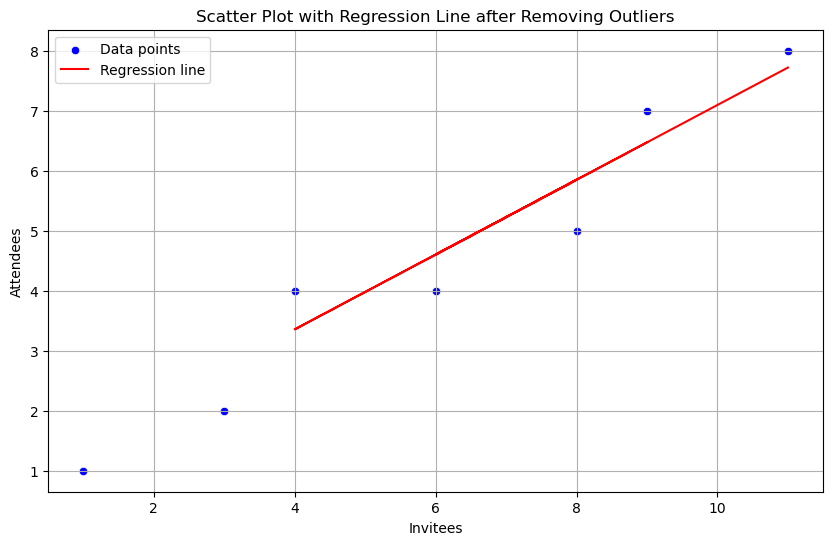

In [159]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = party_data['Attendees'].quantile(0.25)
Q3 = party_data['Attendees'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
party_data_filtered_iqr = party_data[(party_data['Attendees'] >= lower_bound) & (party_data['Attendees'] <= upper_bound)]

print("Data after removing outliers using IQR:")
print(party_data_filtered_iqr)



# Re-define variables after filtering
X_filtered = party_data_filtered['Invitees'].values.reshape(-1, 1)
y_filtered = party_data_filtered['Attendees'].values

# Split the filtered data
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Create and fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Make predictions
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

# Calculate R-squared and MSE
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print results
print('R-squared:')
print('Train:', r2_train)
print('Test:', r2_test)

print('Mean Squared Error:')
print('Train:', mse_train)
print('Test:', mse_test)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=party_data_filtered, x='Invitees', y='Attendees', color='blue', label='Data points')
plt.plot(X_train, y_train_pred, color='red', label='Regression line')
plt.title('Scatter Plot with Regression Line after Removing Outliers')
plt.xlabel('Invitees')
plt.ylabel('Attendees')
plt.legend()
plt.grid(True)
plt.show()

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

En resumen, aunque el modelo actual muestra una mejor precisión en el entrenamiento, sufre de una mala generalización a los datos de prueba, como lo indica el R-squared negativo. Esto resalta la necesidad de refinar el modelo aún más, posiblemente considerando técnicas de modelado más simples o reuniendo más datos para mejorar el rendimiento general. Además, es posible que tengamos muy pocas instancias para ajustar adecuadamente los datos, lo que podría estar afectando nuestra capacidad para generalizar a nuevos ejemplos.